In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [5]:
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [6]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [7]:
x.shape

(84, 2)

In [8]:
y.shape

(84,)

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#Coefficient
reg.coef_

array([ 0.00165354, -0.00826982])

In [12]:
#intercept
reg.intercept_

0.29603261264909353

In [13]:
reg.score(x,y)

0.40668119528142815

$R^2_{adj.} = 1  - (1-R^2)*\frac{n-1}{n-p-1}$

$R^2_{adj.} = 1  - (1-R^2)*\frac{n-1}{n-p-1}$

In [14]:
x.shape

(84, 2)

In [15]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

In [16]:
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [17]:
adj_r2

0.39203134825134

In [18]:
from sklearn.feature_selection import f_regression

In [19]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [20]:
p_values = f_regression(x,y)[1]

In [22]:
p_values.round(3)

array([0.   , 0.676])

In [23]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])

In [24]:
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [25]:
reg_summary['Coefficients'] = reg.coef_

In [26]:
reg_summary

,Features,Coefficients
0,SAT,0.001654
1,"Rand 1,2,3",-0.008270


In [27]:
reg_summary['p-values'] = p_values.round(3)

In [29]:
reg_summary['Intercept'] = reg.intercept_

In [30]:
reg_summary

,Features,Coefficients,p-values,Intercept
0,SAT,0.001654,0.000,0.296033
1,"Rand 1,2,3",-0.008270,0.676,0.296033


In [31]:
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [37]:
x.head()

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [38]:
scaler.fit(x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
x_scaled = scaler.transform(x)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [43]:
x.head()

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2


In [44]:
reg1 = LinearRegression()

In [45]:
reg1.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
reg1.coef_

array([ 0.17181389, -0.00703007])

In [49]:
reg1.score(x_scaled, y)

0.4066811952814283

In [50]:
new_data = pd.DataFrame(data=[[1700,2],[1800,1]], columns=['SAT','Rand 1,2,3'])

In [51]:
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [ ]:
reg1.predict()

In [52]:
reg2 = LinearRegression()

In [53]:
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

In [54]:
reg2.fit(x_simple_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
new_scaled_data = scaler.transform(new_data)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [57]:
reg2.predict(new_scaled_data[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [61]:
X_train

,SAT,"Rand 1,2,3"
31,1934,1
34,1880,2
44,1990,1
83,2050,2
16,1755,3
64,1893,1
7,1764,1
67,1934,2
56,1730,2
19,1786,3


In [62]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [63]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [65]:
raw_data['Attendance'] = raw_data['Attendance'].map({'Yes':1,'No':0})

In [66]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [68]:
y.head()

0    2.40
1    2.52
2    2.54
3    2.74
4    2.83
Name: GPA, dtype: float64

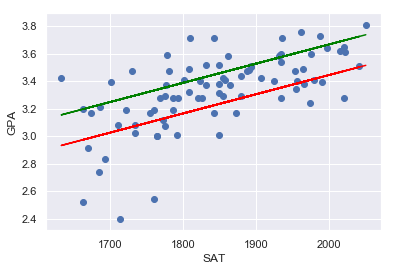

In [75]:
plt.scatter(raw_data['SAT'],y)
plt.xlabel('SAT')
plt.ylabel('GPA')

yhat_no = 0.6439+0.0014*raw_data['SAT']
yhat_yes = 0.6439+0.0014*raw_data['SAT']+0.2226
plt.plot(raw_data['SAT'], yhat_no, c='red')
plt.plot(raw_data['SAT'], yhat_yes, c='green')